In [1]:
#Import the required packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load data

events = pd.read_csv(r'/Users/thoitruong/Documents/Portfolio/maven_challenge/events.csv')
customers = pd.read_csv(r'/Users/thoitruong/Documents/Portfolio/maven_challenge/customers.csv')
offers = pd.read_csv(r'/Users/thoitruong/Documents/Portfolio/maven_challenge/offers.csv')

In [3]:
#Profile data
events.info()
print('\n')
customers.info()
print('\n')
offers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  306534 non-null  object
 1   event        306534 non-null  object
 2   value        306534 non-null  object
 3   time         306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       17000 non-null  object 
 1   became_member_on  17000 non-null  int64  
 2   gender            14825 non-null  object 
 3   age               17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (

In [4]:
events.head(5)

,customer_id,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [5]:
events[events['event']=='offer completed']['value'].apply(
    lambda x: (x['reward'], x['offer_id']) if isinstance(x, dict) else (eval(x)['reward'], eval(x)['offer_id'])
).apply(pd.Series).drop_duplicates(ignore_index=True).sort_values(by=[0])

,0,1
0,2,2906b810c7d4411798c6938adc9daaa5
1,2,fafdcd668e3743c1bb461111dcafc2a4
5,3,2298d6c36e964ae4a3e7e9706d1fb8c2
2,5,9b98b8c7a33c4b65b9aebfe6a799e6d9
6,5,f19421c1d4aa40978ebb69ca19b0e20d
7,5,0b1e1539f2cc45b7b9fa7c272da2e1d7
3,10,ae264e3637204a6fb9bb56bc8210ddfd
4,10,4d5c57ea9a6940dd891ad53e9dbe8da0


In [6]:
activities = events[~events['event'].isin(['transaction'])]

In [7]:
activities['offer_id'] = activities.apply(
    lambda row: eval(row['value'])['offer_id'] if row['event'] =='offer completed' else eval(row['value'])['offer id'], axis=1
)

/var/folders/pp/ynfzr7yx2mz8y_75j6hfpwt80000gn/T/ipykernel_15396/219394966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activities['offer_id'] = activities.apply(


In [8]:
activities.drop(['value'], axis=1, inplace=True)

/var/folders/pp/ynfzr7yx2mz8y_75j6hfpwt80000gn/T/ipykernel_15396/2157699075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activities.drop(['value'], axis=1, inplace=True)


In [9]:
activities.dtypes

customer_id    object
event          object
time            int64
offer_id       object
dtype: object

In [10]:
activities = activities.merge(offers, how = 'inner', on = 'offer_id')

In [11]:
activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167581 entries, 0 to 167580
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  167581 non-null  object
 1   event        167581 non-null  object
 2   time         167581 non-null  int64 
 3   offer_id     167581 non-null  object
 4   offer_type   167581 non-null  object
 5   difficulty   167581 non-null  int64 
 6   reward       167581 non-null  int64 
 7   duration     167581 non-null  int64 
 8   channels     167581 non-null  object
dtypes: int64(4), object(5)
memory usage: 11.5+ MB


In [12]:
activities.head(5)

,customer_id,event,time,offer_id,offer_type,difficulty,reward,duration,channels
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,5,7,"['web', 'email', 'mobile']"
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,20,5,10,"['web', 'email']"
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,discount,10,2,7,"['web', 'email', 'mobile']"
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,discount,10,2,10,"['web', 'email', 'mobile', 'social']"
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,10,5,"['web', 'email', 'mobile', 'social']"


In [13]:
transactions = events[events['event'].isin(['transaction'])]

In [14]:
transactions['value'] = transactions['value'].apply(
    lambda x: x['amount'] if isinstance(x, dict) else eval(x)['amount'])

/var/folders/pp/ynfzr7yx2mz8y_75j6hfpwt80000gn/T/ipykernel_15396/3884159959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['value'] = transactions['value'].apply(


In [15]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138953 entries, 12654 to 306533
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   customer_id  138953 non-null  object 
 1   event        138953 non-null  object 
 2   value        138953 non-null  float64
 3   time         138953 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.3+ MB


In [16]:
transactions.describe(include='object')

,customer_id,event
count,138953,138953
unique,16578,1
top,79d9d4f86aca4bed9290350fb43817c2,transaction
freq,36,138953


In [17]:
rfm = transactions.groupby('customer_id').agg({'time': [np.max, 'count'], 'value': np.sum})

/var/folders/pp/ynfzr7yx2mz8y_75j6hfpwt80000gn/T/ipykernel_15396/4061989662.py:1: FutureWarning: The provided callable <function max at 0x1066ffd80> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  rfm = transactions.groupby('customer_id').agg({'time': [np.max, 'count'], 'value': np.sum})
/var/folders/pp/ynfzr7yx2mz8y_75j6hfpwt80000gn/T/ipykernel_15396/4061989662.py:1: FutureWarning: The provided callable <function sum at 0x1066ff6a0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  rfm = transactions.groupby('customer_id').agg({'time': [np.max, 'count'], 'value': np.sum})


In [18]:
rfm

time         value
                                  max count     sum
customer_id                                        
0009655768c64bdeb2e877511632db8f  696     8  127.60
00116118485d4dfda04fdbaba9a87b5c  474     3    4.09
0011e0d4e6b944f998e987f904e8c1e5  654     5   79.46
0020c2b971eb4e9188eac86d93036a77  708     8  196.86
0020ccbbb6d84e358d3414a3ff76cffd  672    12  154.05
...                               ...   ...     ...
fff3ba4757bd42088c044ca26d73817a  552    11  580.98
fff7576017104bcc8677a8d63322b5e1  696     6   29.94
fff8957ea8b240a6b5e634b6ee8eafcf  576     5   12.15
fffad4f4828548d1b5583907f2e9906b  678    12   88.83
ffff82501cea40309d5fdd7edcca4a07  648    15  226.07

[16578 rows x 3 columns]

In [19]:
# rfm.columns = ['_'.join(col) for col in rfm.columns]
rfm.columns = ['r','f','m']


In [20]:
rfm.reset_index(inplace=True)

In [21]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16578 entries, 0 to 16577
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  16578 non-null  object 
 1   r            16578 non-null  int64  
 2   f            16578 non-null  int64  
 3   m            16578 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 518.2+ KB


In [22]:
rfm.describe(percentiles=[0.25,.5,.75,.98,.995]).T

,count,mean,std,min,25%,50%,75%,98%,99.5%,max
r,16578.0,628.574738,82.766010,12.00,594.0000,654.00,690.0000,714.0000,714.00000,714.00
f,16578.0,8.381771,5.009822,1.00,5.0000,7.00,11.0000,21.0000,25.00000,36.00
m,16578.0,107.096874,126.393939,0.05,23.6825,72.41,150.9375,420.1224,903.05385,1608.69


In [23]:
rfm['r'] = 720 - rfm['r']

array([[<Axes: title={'center': 'r'}>],
       [<Axes: title={'center': 'f'}>],
       [<Axes: title={'center': 'm'}>]], dtype=object)

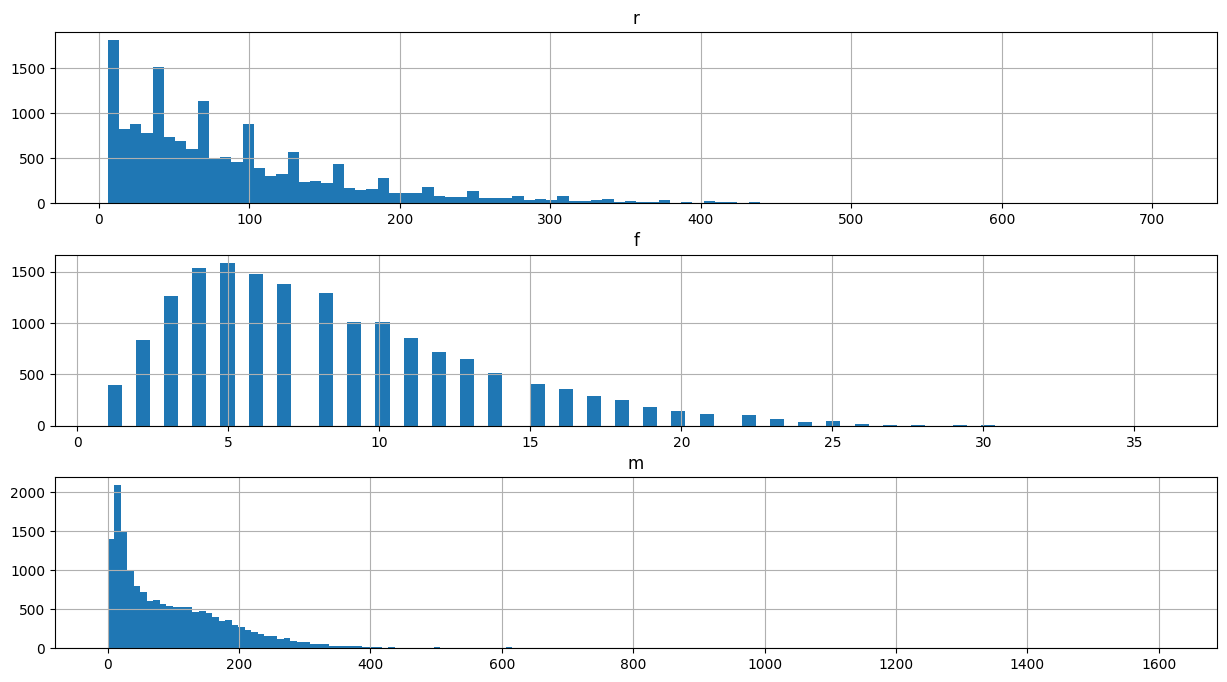

In [24]:
rfm.hist(bins='auto', figsize=(15, 8), layout=(3, 1), xlabelsize=10, ylabelsize=10)

In [25]:
cust_offers = pd.pivot_table(
    activities,
    values=['channels'],
    index='customer_id',        # Rows of the pivot table
    columns=['event'],            # Columns to create in the pivot table
    aggfunc='count',            # Aggregation function (count occurrences)
    fill_value=0                # Fill missing values with 0
).reset_index()

In [26]:
cust_offers.columns = ['customer_id','offer completed', 'offer received', 'offer viewed']

In [27]:
cust_offers['ctr'] = cust_offers['offer completed']/cust_offers['offer received']

In [28]:
cust = rfm.merge(cust_offers, how='left', on='customer_id')

In [39]:
cust.fillna(0, inplace=True)

In [40]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16578 entries, 0 to 16577
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      16578 non-null  object 
 1   r                16578 non-null  int64  
 2   f                16578 non-null  int64  
 3   m                16578 non-null  float64
 4   offer completed  16578 non-null  float64
 5   offer received   16578 non-null  float64
 6   offer viewed     16578 non-null  float64
 7   ctr              16578 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 1.0+ MB


In [45]:
cust

,customer_id,r,f,m,offer completed,offer received,offer viewed,ctr
0,0009655768c64bdeb2e877511632db8f,24,8,127.60,3.0,5.0,4.0,0.60
1,00116118485d4dfda04fdbaba9a87b5c,246,3,4.09,0.0,2.0,2.0,0.00
2,0011e0d4e6b944f998e987f904e8c1e5,66,5,79.46,3.0,5.0,5.0,0.60
3,0020c2b971eb4e9188eac86d93036a77,12,8,196.86,3.0,5.0,3.0,0.60
4,0020ccbbb6d84e358d3414a3ff76cffd,48,12,154.05,3.0,4.0,4.0,0.75
...,...,...,...,...,...,...,...,...
16573,fff3ba4757bd42088c044ca26d73817a,168,11,580.98,3.0,6.0,3.0,0.50
16574,fff7576017104bcc8677a8d63322b5e1,24,6,29.94,3.0,5.0,4.0,0.60
16575,fff8957ea8b240a6b5e634b6ee8eafcf,144,5,12.15,0.0,3.0,2.0,0.00
16576,fffad4f4828548d1b5583907f2e9906b,42,12,88.83,3.0,4.0,4.0,0.75


In [30]:
rfm_scaled = rfm.copy()

In [31]:
rfm.drop(['customer_id'], axis=1, inplace=True)

In [32]:
from sklearn.preprocessing import MinMaxScaler

rfm_scaled.drop(['customer_id'], axis=1, inplace=True)

scaler = MinMaxScaler()
rfm_scaled[rfm_scaled.columns.to_list()] = scaler.fit_transform(rfm_scaled[rfm_scaled.columns.to_list()])

#-----------------------------------------------------
print(rfm_scaled)


              r         f         m
0      0.025641  0.200000  0.079291
1      0.341880  0.057143  0.002511
2      0.085470  0.114286  0.049365
3      0.008547  0.200000  0.122346
4      0.059829  0.314286  0.095733
...         ...       ...       ...
16573  0.230769  0.285714  0.361131
16574  0.025641  0.142857  0.018581
16575  0.196581  0.114286  0.007522
16576  0.051282  0.314286  0.055189
16577  0.094017  0.400000  0.140504

[16578 rows x 3 columns]


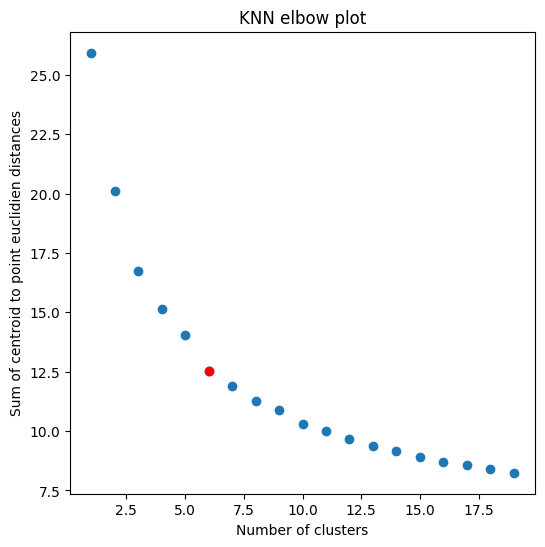

In [33]:
# k-means clustering
from sklearn.cluster import KMeans

# Choose range for cluster sizes to plot
clusterSizes = list(range(1,20))
avgDistances = []

for k in clusterSizes:
    # make and fit a model with k clusters
    mdlKMeans = KMeans(n_init = 1, # number of different centroid seed initializations (number of times algorithm is run)
                      n_clusters=k, # number of clusters (k)
                      random_state = 5) # random seed for kmean algorithm

    mdlKMeans.fit(rfm_scaled)

    # Get distances for each point that is fit to the model
    distsForK = mdlKMeans.transform(rfm_scaled)

    # Get y values (avg distance) for the plot
    point2ClusterDistance = np.min(distsForK,axis = 1)
    avgDistances.extend([np.sqrt((point2ClusterDistance**2).sum())])

plt.figure(figsize=(6,6))
plt.scatter(clusterSizes,avgDistances)
plt.ylabel('Sum of centroid to point euclidien distances')
plt.xlabel('Number of clusters')
plt.title('KNN elbow plot')
#You can modify the code below according to elbow plot
plt.scatter(clusterSizes[5] , avgDistances[5], color = 'red')
plt.show()

In [41]:
# Define and fit the model, which is similar format to previous regression models
mdlKMeans = KMeans(n_init = 1, n_clusters=6, random_state = 5)
mdlKMeans.fit(cust[['r','f','m','ctr']])

# Get cluster assignments for each datapoint
clK = mdlKMeans.labels_

In [42]:
clK_df = pd.DataFrame(clK, columns=['cluster'])
result = pd.concat([cust, clK_df], axis=1)

In [43]:
numerical_col = [col for col in result.columns if col not in ['cluster','customer_id']]

In [44]:
result_summary = (
    result.groupby('cluster')
    .agg({**{'cluster': 'count'}, **{col: 'mean' for col in numerical_col}})
    .rename(columns={'cluster': 'num_customers', **{col: f'{col}_mean' for col in numerical_col}})
    .T.style
    .background_gradient(axis=1, cmap='Blues')
    .format(precision=2)  # Use format() instead of set_precision()
)

result_summary

cluster,0,1,2,3,4,5
num_customers,6060.00,1444.00,4440.00,1063.00,228.00,3343.00
r_mean,46.40,61.39,59.39,316.72,74.03,158.11
f_mean,8.56,13.39,9.68,3.60,10.61,5.53
m_mean,38.63,299.34,156.88,46.86,844.85,50.89
offer completed_mean,1.23,3.85,3.19,0.95,3.51,1.36
offer received_mean,4.48,4.83,4.50,4.37,4.68,4.35
offer viewed_mean,3.26,4.02,3.58,3.18,3.79,3.15
ctr_mean,0.28,0.80,0.71,0.22,0.75,0.32


In [ ]:
result.groupby('cluster')['m'].sum()/result['m'].sum()*100

cluster
0    13.191912
1    24.345572
2    39.238109
3     2.805469
4    10.849424
5     9.569514
Name: m, dtype: float64

In [59]:
result.describe()

,r,f,m,offer completed,offer received,offer viewed,ctr,cluster
count,16578.000000,16578.000000,16578.000000,16578.000000,16578.000000,16578.000000,16578.000000,16578.000000
mean,91.425262,8.381771,107.096874,2.025516,4.487634,3.392026,0.450992,1.878393
std,82.766010,5.009822,126.393939,1.594242,1.074921,1.291669,0.336304,1.862448
min,6.000000,1.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,5.000000,23.682500,1.000000,4.000000,2.000000,0.166667,0.000000
50%,66.000000,7.000000,72.410000,2.000000,5.000000,3.000000,0.500000,2.000000
75%,126.000000,11.000000,150.937500,3.000000,5.000000,4.000000,0.750000,3.000000
max,708.000000,36.000000,1608.690000,6.000000,6.000000,6.000000,1.000000,5.000000


In [ ]:
result['cluster'].value_counts(normalize=True).sort_index()*100

cluster
0    36.554470
1     8.710339
2    26.782483
3     6.412112
4     1.375317
5    20.165279
Name: proportion, dtype: float64

In [52]:
result[['customer_id', 'r', 'f', 'm', 'cluster']].to_csv(f'/Users/thoitruong/Documents/Portfolio/maven_challenge/clusters.csv', index=False)

In [53]:
activities.to_csv(f'/Users/thoitruong/Documents/Portfolio/maven_challenge/activities.csv', index=False)

In [54]:
transactions.to_csv(f'/Users/thoitruong/Documents/Portfolio/maven_challenge/transactions.csv', index=False)